In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [4]:
data = pd.read_csv(r"F:\Uni of Kent\GRIP\Prediction using Supervised - ML\Student_hours.csv")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.shape

(25, 2)

In [6]:
data.info

<bound method DataFrame.info of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

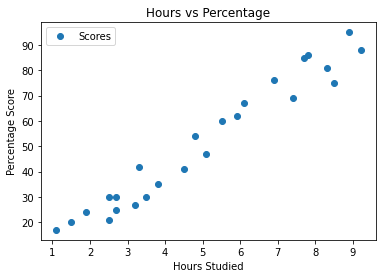

In [9]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [10]:
from sklearn.linear_model import RANSACRegressor
from sklearn.datasets import make_regression

In [33]:
x_train, x_test, y_train, y_test = train_test_split(data['Hours'], data['Scores'], test_size=0.20, random_state=0)

In [34]:
x_train = x_train.values.reshape(len(x_train), 1)

In [35]:
x_train.shape

(20, 1)

In [36]:
x_test = x_test.values.reshape(len(x_test), 1)

In [37]:
x_test.shape

(5, 1)

In [38]:
ransac = RANSACRegressor()

In [39]:
# Fit the RANSAC model to your training data
ransac.fit(x_train, y_train)

# Obtain the inliers and outliers from the RANSAC model
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

In [40]:
y_pred = ransac.predict(x_test)

In [41]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: ", mse)
print("R2 Score: ", r2)

Mean Squared Error:  21.5987693072174
R2 Score:  0.9454906892105356


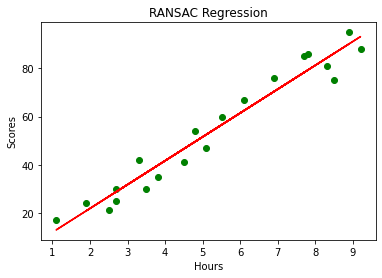

In [42]:
plt.scatter(x_train, y_train, color='g')
plt.plot(x_train, ransac.predict(x_train), color='r')
plt.xlabel("Hours")
plt.ylabel('Scores')
plt.title("RANSAC Regression")
plt.show()

In [43]:
hours = 9.5
hours = np.array(hours).reshape(1, -1)  # Reshape the input as a 2D array

score_pred = ransac.predict(hours)
print("Predicted score for hours 9.5: ", score_pred)

Predicted score for hours 9.5:  [96.16939661]


In [44]:
from sklearn.metrics import mean_absolute_error

y_pred = ransac.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error: ", mae)

Mean Absolute Error:  4.183859899002975


In [45]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [46]:
y_pred = model.predict(x_test)

In [47]:
model.score(x_test,y_test)

0.9454906892105356

In [48]:
RMSE = np.sqrt( mean_squared_error(y_test, y_pred))
RMSE

4.6474476121003665

In [49]:
r2 = r2_score(y_test, y_pred)
r2

0.9454906892105356